X_train shape: (436, 6)
X_test shape: (109, 6)
y_train shape: (436,)
y_test shape: (109,)
--- Linear Regression ---
RMSE: 5.781113904563274e-10
R2 Score: 1.0

--- Decision Tree Regressor ---
RMSE: 245696.0172185626
R2 Score: 0.9880570394841105

--- Random Forest Regressor ---
RMSE: 199321.8879545527
R2 Score: 0.9921399420561263



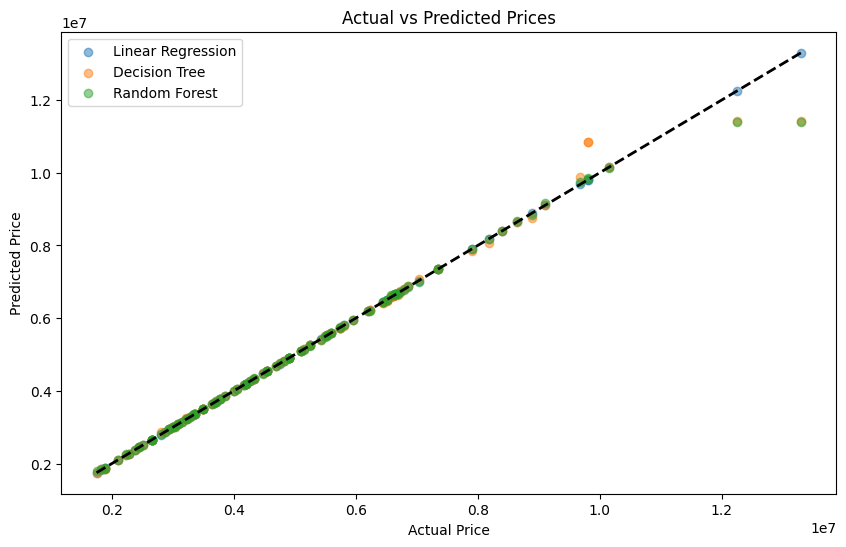

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load dataset
dataset = pd.read_csv('Housing.csv')

# 2️⃣ Choose target column (single column!)
y = dataset["price"]

# 3️⃣ Drop unused columns
cols_to_drop = ['Amount(in rupees)', 'Dimensions', 'Plot Area', 'Super Area']
X = dataset.drop(columns=cols_to_drop, errors='ignore')

# 4️⃣ Identify numeric & categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
known_categorical_cols = ['location', 'Status', 'Floor', 'Transaction', 'Furnishing',
                          'facing', 'overlooking', 'Society', 'Ownership', 'Carpet Area',
                          'Balcony', 'Car Parking']
categorical_cols = [col for col in known_categorical_cols if col in X.columns]

# 5️⃣ Build preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)

# 6️⃣ Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

# 7️⃣ Impute missing values in y (optional, safe)
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1,1)).ravel()

# 8️⃣ Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_imputed, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 9️⃣ Train models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

regressor_decision = DecisionTreeRegressor(random_state=42)
regressor_decision.fit(X_train, y_train)

regressor_random = RandomForestRegressor(random_state=42)
regressor_random.fit(X_train, y_train)

# 🔟 Predict on test set
y_pred_lr = regressor_linear.predict(X_test)
y_pred_dtr = regressor_decision.predict(X_test)
y_pred_rfr = regressor_random.predict(X_test)

# 11️⃣ Evaluate (RMSE & R2)
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    print(f'--- {name} ---')
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('R2 Score:', r2_score(y_true, y_pred))
    print()

evaluate_model('Linear Regression', y_test, y_pred_lr)
evaluate_model('Decision Tree Regressor', y_test, y_pred_dtr)
evaluate_model('Random Forest Regressor', y_test, y_pred_rfr)

# 12️⃣ Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_dtr, alpha=0.5, label='Decision Tree')
plt.scatter(y_test, y_pred_rfr, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()